# **IPL-1st-Innings-Score-Prediction**

In [1]:
# Importing necessary libraries

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

# Import dataset

df = pd.read_csv('ipl.csv')

In [2]:
# Info on dataset

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 76014 entries, 0 to 76013
Data columns (total 15 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   mid             76014 non-null  int64  
 1   date            76014 non-null  object 
 2   venue           76014 non-null  object 
 3   bat_team        76014 non-null  object 
 4   bowl_team       76014 non-null  object 
 5   batsman         76014 non-null  object 
 6   bowler          76014 non-null  object 
 7   runs            76014 non-null  int64  
 8   wickets         76014 non-null  int64  
 9   overs           76014 non-null  float64
 10  runs_last_5     76014 non-null  int64  
 11  wickets_last_5  76014 non-null  int64  
 12  striker         76014 non-null  int64  
 13  non-striker     76014 non-null  int64  
 14  total           76014 non-null  int64  
dtypes: float64(1), int64(8), object(6)
memory usage: 8.7+ MB


In [3]:
# Frist 7 rows of dataset

df.head(7)

,mid,date,venue,bat_team,bowl_team,batsman,bowler,runs,wickets,overs,runs_last_5,wickets_last_5,striker,non-striker,total
0,1,2008-04-18,M Chinnaswamy Stadium,Kolkata Knight Riders,Royal Challengers Bangalore,SC Ganguly,P Kumar,1,0,0.1,1,0,0,0,222
1,1,2008-04-18,M Chinnaswamy Stadium,Kolkata Knight Riders,Royal Challengers Bangalore,BB McCullum,P Kumar,1,0,0.2,1,0,0,0,222
2,1,2008-04-18,M Chinnaswamy Stadium,Kolkata Knight Riders,Royal Challengers Bangalore,BB McCullum,P Kumar,2,0,0.2,2,0,0,0,222
3,1,2008-04-18,M Chinnaswamy Stadium,Kolkata Knight Riders,Royal Challengers Bangalore,BB McCullum,P Kumar,2,0,0.3,2,0,0,0,222
4,1,2008-04-18,M Chinnaswamy Stadium,Kolkata Knight Riders,Royal Challengers Bangalore,BB McCullum,P Kumar,2,0,0.4,2,0,0,0,222
5,1,2008-04-18,M Chinnaswamy Stadium,Kolkata Knight Riders,Royal Challengers Bangalore,BB McCullum,P Kumar,2,0,0.5,2,0,0,0,222
6,1,2008-04-18,M Chinnaswamy Stadium,Kolkata Knight Riders,Royal Challengers Bangalore,BB McCullum,P Kumar,3,0,0.6,3,0,0,0,222


In [4]:
df.columns

Index(['mid', 'date', 'venue', 'bat_team', 'bowl_team', 'batsman', 'bowler',
       'runs', 'wickets', 'overs', 'runs_last_5', 'wickets_last_5', 'striker',
       'non-striker', 'total'],
      dtype='object')

In [5]:
# Drop unnecessary columns

not_necessary = ['mid','batsman','bowler','striker','non-striker']

df.drop(not_necessary,axis=1,inplace=True)

In [6]:
# Brief stats on dataset

df.describe()

,runs,wickets,overs,runs_last_5,wickets_last_5,total
count,76014.000000,76014.000000,76014.000000,76014.000000,76014.000000,76014.000000
mean,74.889349,2.415844,9.783068,33.216434,1.120307,160.901452
std,48.823327,2.015207,5.772587,14.914174,1.053343,29.246231
min,0.000000,0.000000,0.000000,0.000000,0.000000,67.000000
25%,34.000000,1.000000,4.600000,24.000000,0.000000,142.000000
50%,70.000000,2.000000,9.600000,34.000000,1.000000,162.000000
75%,111.000000,4.000000,14.600000,43.000000,2.000000,181.000000
max,263.000000,10.000000,19.600000,113.000000,7.000000,263.000000


In [7]:
# import data-time and covert date column to datetime object

from datetime import datetime

df['date'] = df['date'].apply(lambda x : datetime.strptime(x,'%Y-%m-%d'))

## **Data Cleaning**

In [8]:
# -----Data Cleaning------
# Keeping only the teams who are consistent in the tournament

consistent_teams = ['Mumbai Indians','Kings XI Punjab','Chennai Super Kings','Royal Challengers Bangalore',\
                    'Kolkata Knight Riders','Delhi Daredevils','Rajasthan Royals','Sunrisers Hyderabad']

df = df[(df['bat_team'].isin(consistent_teams)) & df['bowl_team'].isin(consistent_teams)]

In [9]:
# Removing unnessary venues

Venue = df['venue'].value_counts().head(15).index.to_list()

In [10]:
Venue.remove('Dubai International Cricket Stadium')
Venue.remove('Brabourne Stadium')
Venue.remove('Kingsmead')
Venue.remove('SuperSport Park')

In [11]:
# Renaming those which are not present in Venues to 'Others'

def ven(s):
    if s in Venue:
        return s
    else:
        return 'Others'
    
df['venue'] = df['venue'].apply(ven)

In [12]:
# Removing first 5 overs from every match

df = df[df['overs']>=5.0]

In [13]:
df.shape

(40108, 10)

In [14]:
# Printing randomly picked data

df.sample(10)

,date,venue,bat_team,bowl_team,runs,wickets,overs,runs_last_5,wickets_last_5,total
46439,2013-05-13,Wankhede Stadium,Sunrisers Hyderabad,Mumbai Indians,171,3,19.3,48,1,178
31823,2012-04-15,M Chinnaswamy Stadium,Rajasthan Royals,Royal Challengers Bangalore,102,1,13.5,46,1,195
71831,2017-04-22,Wankhede Stadium,Mumbai Indians,Delhi Daredevils,116,5,16.1,38,1,142
17414,2010-04-02,"Punjab Cricket Association Stadium, Mohali",Kings XI Punjab,Royal Challengers Bangalore,88,3,11.6,38,2,181
30364,2012-04-08,Sawai Mansingh Stadium,Rajasthan Royals,Kolkata Knight Riders,131,4,17.1,49,1,164
37251,2012-05-16,Wankhede Stadium,Kolkata Knight Riders,Mumbai Indians,90,4,13.3,44,1,140
47699,2013-05-22,Feroz Shah Kotla,Sunrisers Hyderabad,Rajasthan Royals,94,4,16.1,39,1,132
5571,2008-05-21,"MA Chidambaram Stadium, Chepauk",Royal Challengers Bangalore,Chennai Super Kings,44,4,10.4,21,2,126
12809,2009-05-20,Others,Rajasthan Royals,Kolkata Knight Riders,87,7,16.5,24,0,101
73394,2017-05-01,Wankhede Stadium,Royal Challengers Bangalore,Mumbai Indians,96,3,11.6,39,1,162


## **Outlier Detection (Inter-Quartile-Range)**

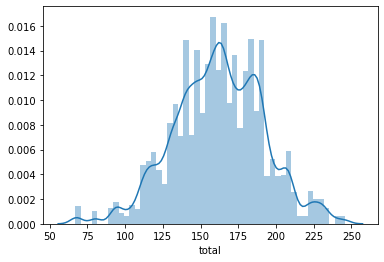

In [15]:
sns.distplot(df['total'])

In [16]:
print(df['total'].max())
print(df['total'].min())

246
67


In [17]:
IQR = df['total'].quantile(0.75) - df['total'].quantile(0.25)
IQR

41.0

In [18]:
upp_score = df['total'].quantile(0.75) + 1.5*IQR
upp_score

244.5

In [19]:
low_score = df['total'].quantile(0.25) - 1.5*IQR
low_score

80.5

In [20]:
# removing outliers

df = df[(df['total']<upp_score) & (df['total']>low_score)]

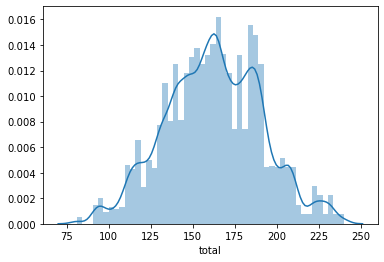

In [21]:
# checking distribution for total score

sns.distplot(df['total'])

## **Exploratory Data Analysis**

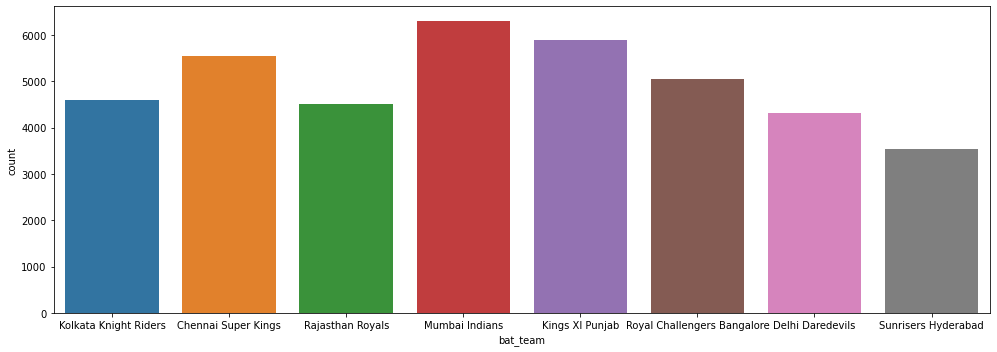

In [22]:
# Count of each team

plt.figure(figsize=(14,5))
sns.countplot(x='bat_team',data=df)
plt.tight_layout()

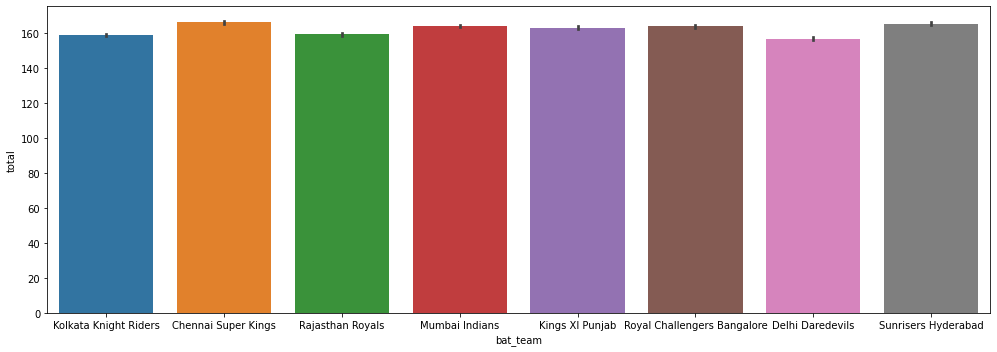

In [23]:
# Average scores for individual teams

plt.figure(figsize=(14,5))
sns.barplot(x='bat_team',y='total',data=df)
plt.tight_layout()

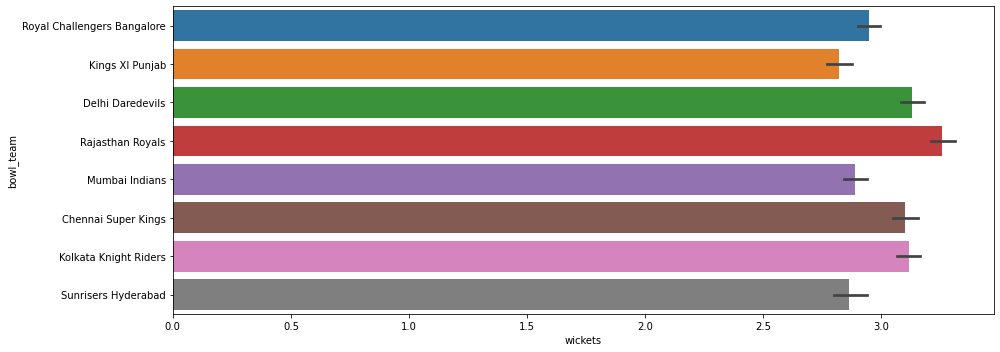

In [24]:
# Average wickets taken

plt.figure(figsize=(14,5))
sns.barplot(x='wickets',y='bowl_team',data=df)
plt.tight_layout()

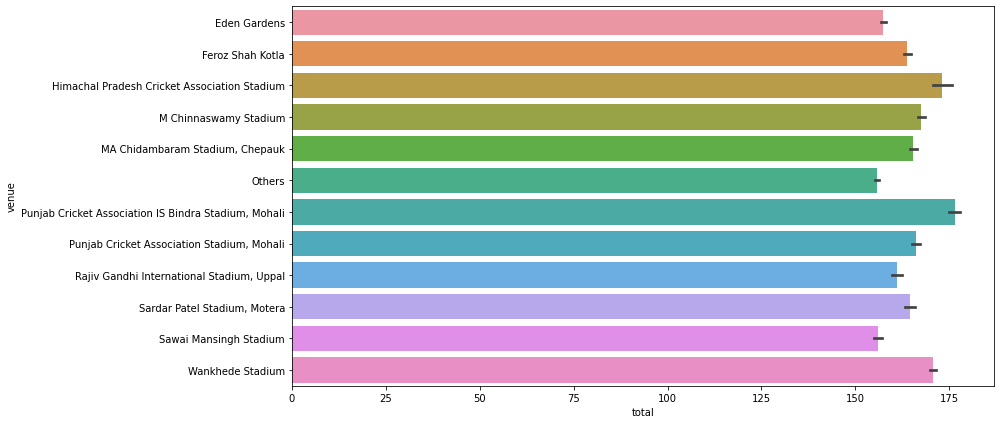

In [25]:
# Average first-innings score by venue

plt.figure(figsize=(14,6))
sns.barplot(x='total',y='venue',data=df.sort_values(by='venue'))
plt.tight_layout()

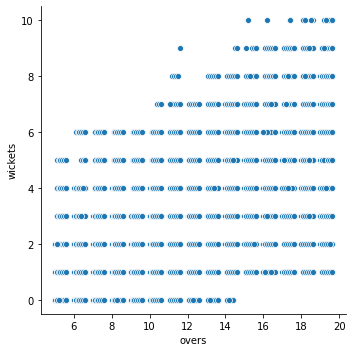

In [26]:
sns.relplot(x='overs',y='wickets',data=df)

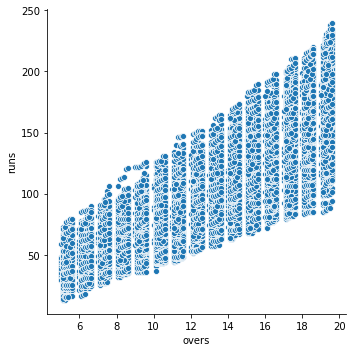

In [27]:
sns.relplot(x='overs',y='runs',data=df)

In [28]:
df.shape

(39728, 10)

## **Data-preprocessing**

In [29]:
df.head()

,date,venue,bat_team,bowl_team,runs,wickets,overs,runs_last_5,wickets_last_5,total
32,2008-04-18,M Chinnaswamy Stadium,Kolkata Knight Riders,Royal Challengers Bangalore,61,0,5.1,59,0,222
33,2008-04-18,M Chinnaswamy Stadium,Kolkata Knight Riders,Royal Challengers Bangalore,61,1,5.2,59,1,222
34,2008-04-18,M Chinnaswamy Stadium,Kolkata Knight Riders,Royal Challengers Bangalore,61,1,5.3,59,1,222
35,2008-04-18,M Chinnaswamy Stadium,Kolkata Knight Riders,Royal Challengers Bangalore,61,1,5.4,59,1,222
36,2008-04-18,M Chinnaswamy Stadium,Kolkata Knight Riders,Royal Challengers Bangalore,61,1,5.5,58,1,222


In [30]:
df['venue'].unique()

array(['M Chinnaswamy Stadium',
       'Punjab Cricket Association Stadium, Mohali', 'Feroz Shah Kotla',
       'Wankhede Stadium', 'Sawai Mansingh Stadium',
       'MA Chidambaram Stadium, Chepauk', 'Eden Gardens', 'Others',
       'Sardar Patel Stadium, Motera',
       'Himachal Pradesh Cricket Association Stadium',
       'Rajiv Gandhi International Stadium, Uppal',
       'Punjab Cricket Association IS Bindra Stadium, Mohali'],
      dtype=object)

In [31]:
df['bat_team'].unique()

array(['Kolkata Knight Riders', 'Chennai Super Kings', 'Rajasthan Royals',
       'Mumbai Indians', 'Kings XI Punjab', 'Royal Challengers Bangalore',
       'Delhi Daredevils', 'Sunrisers Hyderabad'], dtype=object)

In [32]:
# Encoding categorical values using One-Hot-Encoding 

final = pd.get_dummies(df,drop_first=True)
final.head()

,date,runs,wickets,overs,runs_last_5,wickets_last_5,total,venue_Feroz Shah Kotla,venue_Himachal Pradesh Cricket Association Stadium,venue_M Chinnaswamy Stadium,...,bat_team_Rajasthan Royals,bat_team_Royal Challengers Bangalore,bat_team_Sunrisers Hyderabad,bowl_team_Delhi Daredevils,bowl_team_Kings XI Punjab,bowl_team_Kolkata Knight Riders,bowl_team_Mumbai Indians,bowl_team_Rajasthan Royals,bowl_team_Royal Challengers Bangalore,bowl_team_Sunrisers Hyderabad
32,2008-04-18,61,0,5.1,59,0,222,0,0,1,...,0,0,0,0,0,0,0,0,1,0
33,2008-04-18,61,1,5.2,59,1,222,0,0,1,...,0,0,0,0,0,0,0,0,1,0
34,2008-04-18,61,1,5.3,59,1,222,0,0,1,...,0,0,0,0,0,0,0,0,1,0
35,2008-04-18,61,1,5.4,59,1,222,0,0,1,...,0,0,0,0,0,0,0,0,1,0
36,2008-04-18,61,1,5.5,58,1,222,0,0,1,...,0,0,0,0,0,0,0,0,1,0


In [33]:
# Re-arranging the columns

final = final[['date','venue_Feroz Shah Kotla',
       'venue_Himachal Pradesh Cricket Association Stadium',
       'venue_M Chinnaswamy Stadium', 'venue_MA Chidambaram Stadium, Chepauk',
       'venue_Punjab Cricket Association IS Bindra Stadium, Mohali',
       'venue_Punjab Cricket Association Stadium, Mohali',
       'venue_Rajiv Gandhi International Stadium, Uppal',
       'venue_Sardar Patel Stadium, Motera', 'venue_Sawai Mansingh Stadium',
       'venue_Wankhede Stadium','venue_Others', 'bat_team_Delhi Daredevils',
       'bat_team_Kings XI Punjab', 'bat_team_Kolkata Knight Riders',
       'bat_team_Mumbai Indians', 'bat_team_Rajasthan Royals',
       'bat_team_Royal Challengers Bangalore', 'bat_team_Sunrisers Hyderabad',
       'bowl_team_Delhi Daredevils', 'bowl_team_Kings XI Punjab',
       'bowl_team_Kolkata Knight Riders', 'bowl_team_Mumbai Indians',
       'bowl_team_Rajasthan Royals', 'bowl_team_Royal Challengers Bangalore',
       'bowl_team_Sunrisers Hyderabad', 'overs','runs', 'wickets', 'runs_last_5', 'wickets_last_5', 'total']]

In [34]:
final.head()

,date,venue_Feroz Shah Kotla,venue_Himachal Pradesh Cricket Association Stadium,venue_M Chinnaswamy Stadium,"venue_MA Chidambaram Stadium, Chepauk","venue_Punjab Cricket Association IS Bindra Stadium, Mohali","venue_Punjab Cricket Association Stadium, Mohali","venue_Rajiv Gandhi International Stadium, Uppal","venue_Sardar Patel Stadium, Motera",venue_Sawai Mansingh Stadium,...,bowl_team_Mumbai Indians,bowl_team_Rajasthan Royals,bowl_team_Royal Challengers Bangalore,bowl_team_Sunrisers Hyderabad,overs,runs,wickets,runs_last_5,wickets_last_5,total
32,2008-04-18,0,0,1,0,0,0,0,0,0,...,0,0,1,0,5.1,61,0,59,0,222
33,2008-04-18,0,0,1,0,0,0,0,0,0,...,0,0,1,0,5.2,61,1,59,1,222
34,2008-04-18,0,0,1,0,0,0,0,0,0,...,0,0,1,0,5.3,61,1,59,1,222
35,2008-04-18,0,0,1,0,0,0,0,0,0,...,0,0,1,0,5.4,61,1,59,1,222
36,2008-04-18,0,0,1,0,0,0,0,0,0,...,0,0,1,0,5.5,61,1,58,1,222


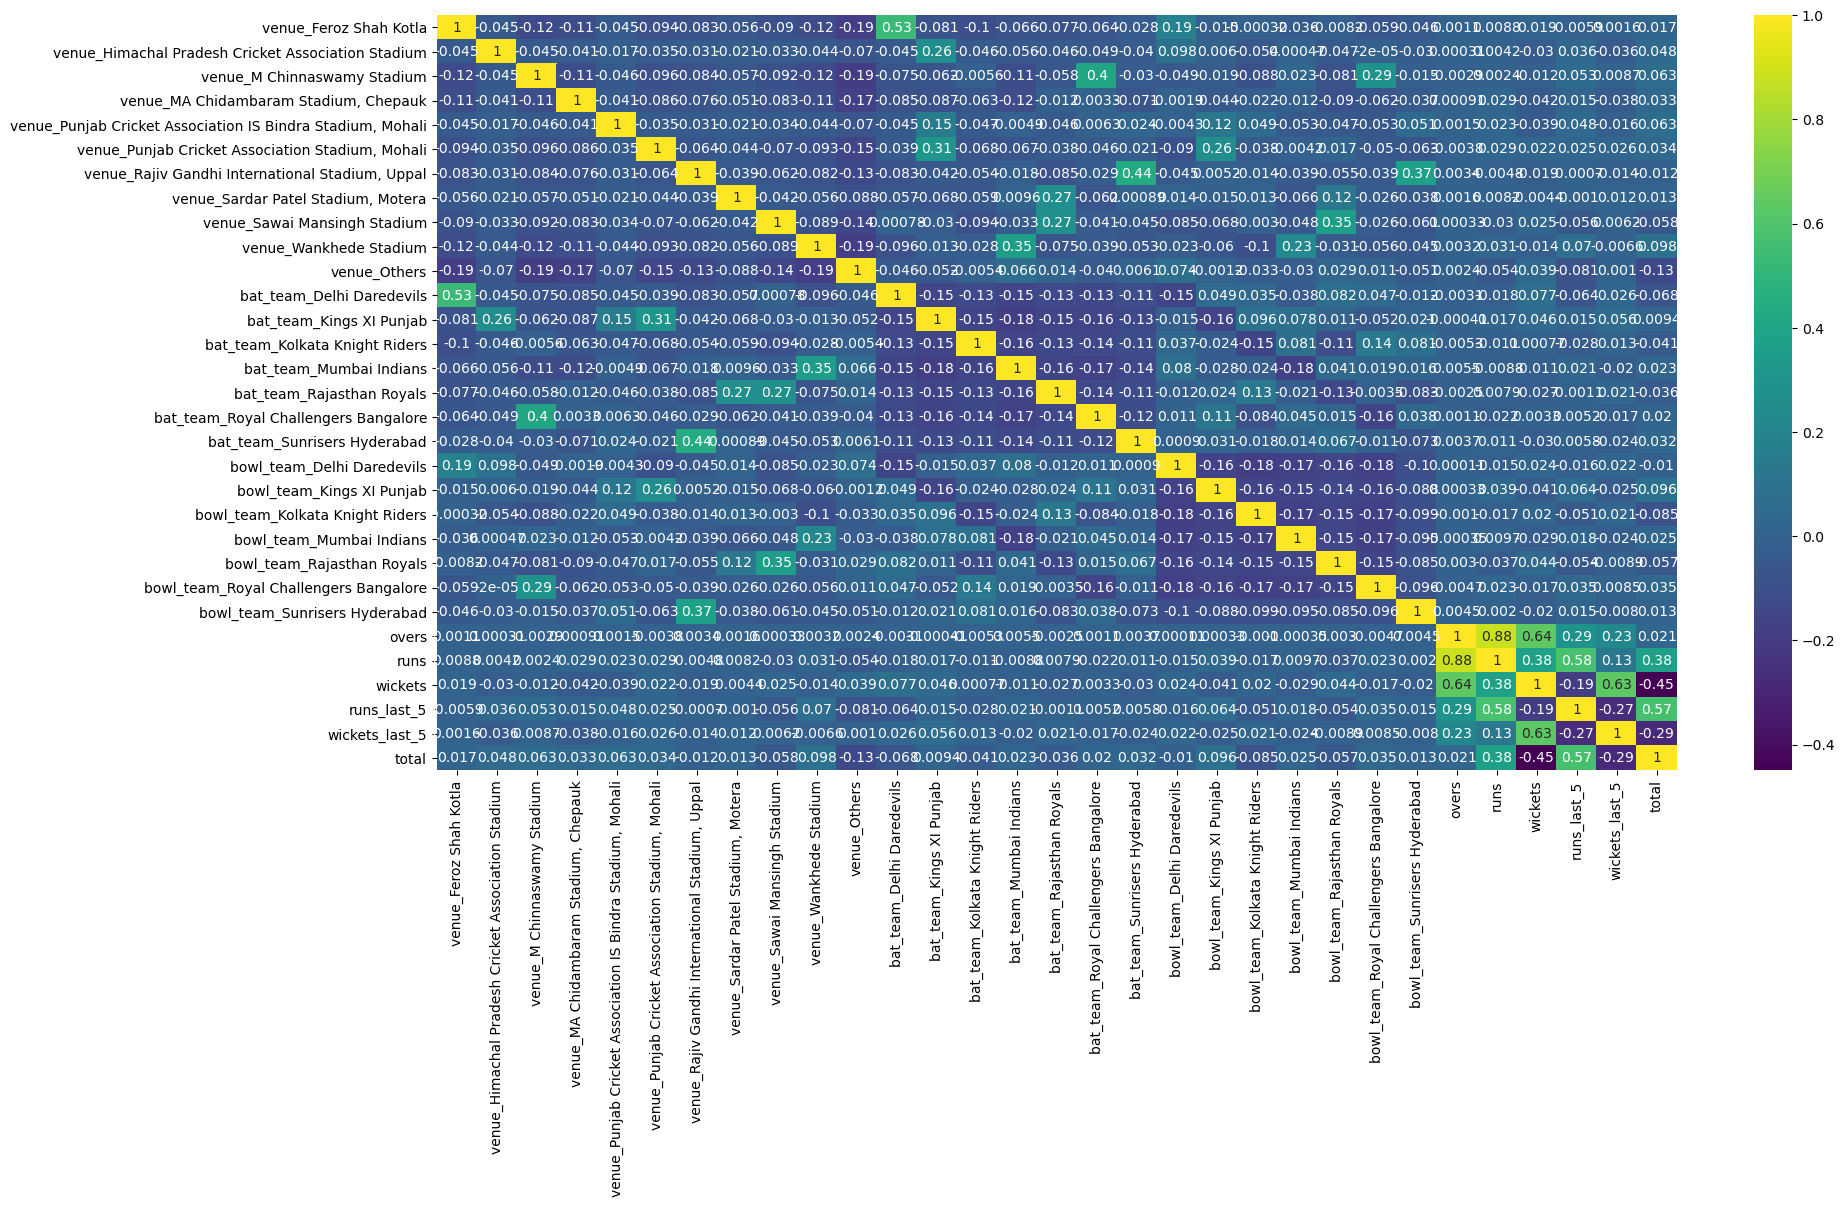

In [35]:
# Featue Importance

plt.figure(figsize=(20,10),dpi=100)
sns.heatmap(final.corr(),annot=True,cmap='viridis')

## **Machine Learning Model**

In [36]:
# Importing necessary libraries

from sklearn.model_selection import cross_val_score
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import RandomizedSearchCV

from sklearn.linear_model import LinearRegression
from sklearn.linear_model import Ridge
from sklearn.linear_model import Lasso
from sklearn.ensemble import ExtraTreesRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.neighbors import KNeighborsRegressor
from sklearn.svm import SVR

from sklearn import metrics

In [117]:
X = final.drop(['date','total'], axis=1)
y = final['total']

In [118]:
X.shape

(39728, 30)

In [119]:
y.shape

(39728,)

In [145]:
X_train.shape

(37027, 30)

In [37]:
# splitting the data into train and test set

X_train = final.drop('total', axis=1)[final['date'].dt.year <= 2016]
X_test = final.drop('total', axis=1)[final['date'].dt.year >= 2017]

In [38]:
y_train = final[final['date'].dt.year <= 2016]['total'].values
y_test = final[final['date'].dt.year >= 2017]['total'].values

In [39]:
# Removing the 'date' column

X_train.drop('date',axis=1,inplace=True)
X_test.drop('date',axis=1,inplace=True)

In [40]:
X_train.columns

Index(['venue_Feroz Shah Kotla',
       'venue_Himachal Pradesh Cricket Association Stadium',
       'venue_M Chinnaswamy Stadium', 'venue_MA Chidambaram Stadium, Chepauk',
       'venue_Punjab Cricket Association IS Bindra Stadium, Mohali',
       'venue_Punjab Cricket Association Stadium, Mohali',
       'venue_Rajiv Gandhi International Stadium, Uppal',
       'venue_Sardar Patel Stadium, Motera', 'venue_Sawai Mansingh Stadium',
       'venue_Wankhede Stadium', 'venue_Others', 'bat_team_Delhi Daredevils',
       'bat_team_Kings XI Punjab', 'bat_team_Kolkata Knight Riders',
       'bat_team_Mumbai Indians', 'bat_team_Rajasthan Royals',
       'bat_team_Royal Challengers Bangalore', 'bat_team_Sunrisers Hyderabad',
       'bowl_team_Delhi Daredevils', 'bowl_team_Kings XI Punjab',
       'bowl_team_Kolkata Knight Riders', 'bowl_team_Mumbai Indians',
       'bowl_team_Rajasthan Royals', 'bowl_team_Royal Challengers Bangalore',
       'bowl_team_Sunrisers Hyderabad', 'overs', 'runs', 'wic

In [206]:
X_train.head(1).loc[32].index.to_list()

['venue_Feroz Shah Kotla',
 'venue_Himachal Pradesh Cricket Association Stadium',
 'venue_M Chinnaswamy Stadium',
 'venue_MA Chidambaram Stadium, Chepauk',
 'venue_Punjab Cricket Association IS Bindra Stadium, Mohali',
 'venue_Punjab Cricket Association Stadium, Mohali',
 'venue_Rajiv Gandhi International Stadium, Uppal',
 'venue_Sardar Patel Stadium, Motera',
 'venue_Sawai Mansingh Stadium',
 'venue_Wankhede Stadium',
 'venue_Others',
 'bat_team_Delhi Daredevils',
 'bat_team_Kings XI Punjab',
 'bat_team_Kolkata Knight Riders',
 'bat_team_Mumbai Indians',
 'bat_team_Rajasthan Royals',
 'bat_team_Royal Challengers Bangalore',
 'bat_team_Sunrisers Hyderabad',
 'bowl_team_Delhi Daredevils',
 'bowl_team_Kings XI Punjab',
 'bowl_team_Kolkata Knight Riders',
 'bowl_team_Mumbai Indians',
 'bowl_team_Rajasthan Royals',
 'bowl_team_Royal Challengers Bangalore',
 'bowl_team_Sunrisers Hyderabad',
 'overs',
 'runs',
 'wickets',
 'runs_last_5',
 'wickets_last_5']

In [754]:
# Feature importance
from sklearn.ensemble import ExtraTreesRegressor

selection = ExtraTreesRegressor()
selection.fit(X_train,y_train)

ExtraTreesRegressor(bootstrap=False, ccp_alpha=0.0, criterion='mse',
                    max_depth=None, max_features='auto', max_leaf_nodes=None,
                    max_samples=None, min_impurity_decrease=0.0,
                    min_impurity_split=None, min_samples_leaf=1,
                    min_samples_split=2, min_weight_fraction_leaf=0.0,
                    n_estimators=100, n_jobs=None, oob_score=False,
                    random_state=None, verbose=0, warm_start=False)

In [755]:
print(selection.feature_importances_)

[0.01365728 0.00397132 0.01699527 0.00951949 0.00136871 0.01101085
 0.00818154 0.00474636 0.00926534 0.01212339 0.01987191 0.00934451
 0.01258301 0.01420449 0.01749204 0.01619185 0.01539007 0.00870652
 0.01593341 0.01625238 0.01612874 0.01580484 0.01365261 0.01372503
 0.00847239 0.06146694 0.21382601 0.20713181 0.18769284 0.02528905]


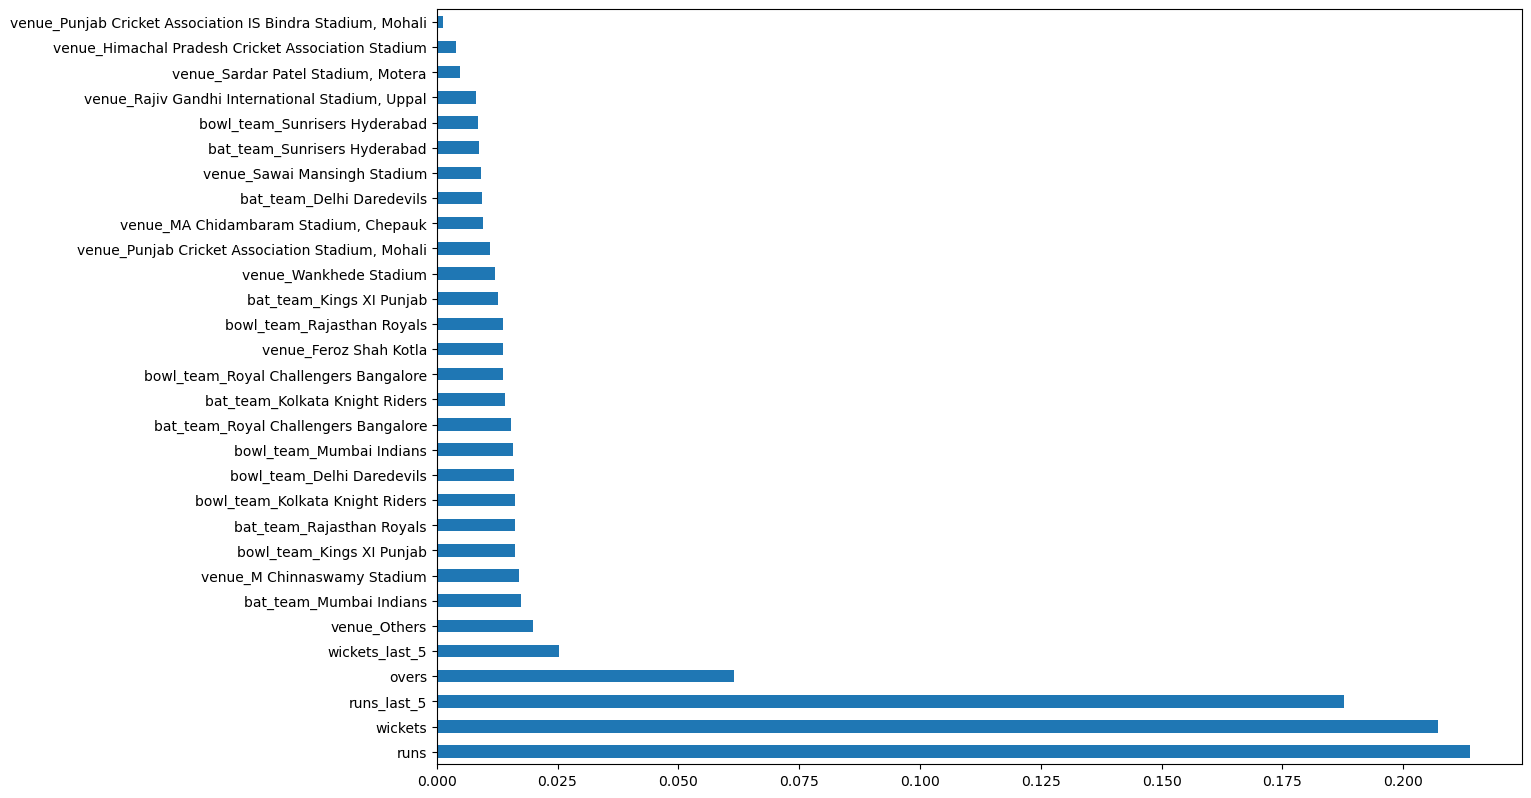

In [768]:
plt.figure(figsize=(14,10),dpi=100)
important_feat = pd.Series(selection.feature_importances_,index=X_train.columns)
important_feat.nlargest(30).plot(kind='barh')

## Linear Regression

In [42]:
lm = LinearRegression()
lm.fit(X_train,y_train)
predictions = lm.predict(X_test)

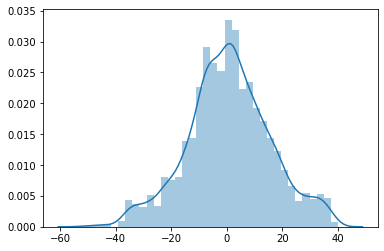

In [43]:
sns.distplot((y_test-predictions))

In [44]:
print('MAE:',metrics.mean_absolute_error(y_test,predictions))
print('MSE:',metrics.mean_squared_error(y_test,predictions))
print('RMSE:',np.sqrt(metrics.mean_squared_error(y_test,predictions)))

MAE: 11.653933838162937
MSE: 226.04730539766086
RMSE: 15.034869650171926


In [45]:
print('score:',lm.score(X_test,y_test))
print(cross_val_score(lm,final.drop(['date','total'],axis=1),final['total'],cv=10).mean())

score: 0.6979229481606618
0.6098165925819425


In [120]:
cross_val_score(LinearRegression(),X,y,cv=20).mean()

0.5949183499418205

## Ridge Regression

In [190]:
ridge = Ridge()
param_grid = {
    'alpha' : [1e-15,1e-10,1e-8,1e-6,1e-4,1e-2,1e-1,1,1000,1200,1400,1600,2000,2400,2800,3200,4000,4100,4200,4300,
               4500,4400,4600,4700,4800,4900,5000,5500,6000]
}

ridge_grid = GridSearchCV(ridge,param_grid,scoring='neg_mean_squared_error',cv=20,n_jobs=-1,verbose=1)

In [191]:
ridge_grid.fit(X_train,y_train)

Fitting 20 folds for each of 29 candidates, totalling 580 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  34 tasks      | elapsed:    2.8s
[Parallel(n_jobs=-1)]: Done 184 tasks      | elapsed:    5.1s
[Parallel(n_jobs=-1)]: Done 580 out of 580 | elapsed:    9.5s finished


GridSearchCV(cv=20, error_score=nan,
             estimator=Ridge(alpha=1.0, copy_X=True, fit_intercept=True,
                             max_iter=None, normalize=False, random_state=None,
                             solver='auto', tol=0.001),
             iid='deprecated', n_jobs=-1,
             param_grid={'alpha': [1e-15, 1e-10, 1e-08, 1e-06, 0.0001, 0.01,
                                   0.1, 1, 1000, 1200, 1400, 1600, 2000, 2400,
                                   2800, 3200, 4000, 4100, 4200, 4300, 4500,
                                   4400, 4600, 4700, 4800, 4900, 5000, 5500,
                                   6000]},
             pre_dispatch='2*n_jobs', refit=True, return_train_score=False,
             scoring='neg_mean_squared_error', verbose=1)

In [192]:
ridge_grid.best_params_

{'alpha': 4600}

In [193]:
ridge_grid.best_score_

-302.09503282606426

In [194]:
predictions = ridge_grid.predict(X_test)

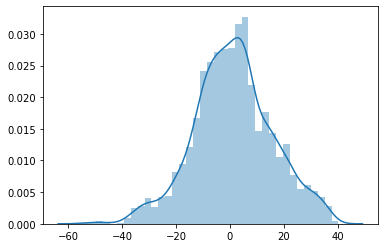

In [195]:
sns.distplot((y_test-predictions))

In [196]:
print('MAE:',metrics.mean_absolute_error(y_test,predictions))
print('MSE:',metrics.mean_squared_error(y_test,predictions))
print('RMSE:',np.sqrt(metrics.mean_squared_error(y_test,predictions)))

MAE: 11.478697028224063
MSE: 216.64680975510672
RMSE: 14.71892692267703


In [197]:
print('score:',ridge_grid.score(X_test,y_test))
#print(cross_val_score(ridge_grid,final.drop(['date','total'],axis=1),final['total'],cv=10).mean())

score: -216.64680975510672


## Lasso Regression

In [154]:
lasso = Lasso()
param_grid = {
    'alpha' : [1e-5,1e-4,1e-3,1e-2,0.05,0.06,0.07,0.08,0.09,0.1,0.2,0.3,0.4,0.5,1]
}

lasso_grid = GridSearchCV(lasso,param_grid,scoring='neg_mean_squared_error',cv=20,n_jobs=-1,verbose=1)

In [155]:
lasso_grid.fit(X_train,y_train)

Fitting 20 folds for each of 15 candidates, totalling 300 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  34 tasks      | elapsed:   11.4s
[Parallel(n_jobs=-1)]: Done 184 tasks      | elapsed:   33.1s
[Parallel(n_jobs=-1)]: Done 300 out of 300 | elapsed:   42.4s finished


GridSearchCV(cv=20, error_score=nan,
             estimator=Lasso(alpha=1.0, copy_X=True, fit_intercept=True,
                             max_iter=1000, normalize=False, positive=False,
                             precompute=False, random_state=None,
                             selection='cyclic', tol=0.0001, warm_start=False),
             iid='deprecated', n_jobs=-1,
             param_grid={'alpha': [1e-05, 0.0001, 0.001, 0.01, 0.05, 0.06, 0.07,
                                   0.08, 0.09, 0.1, 0.2, 0.3, 0.4, 0.5, 1]},
             pre_dispatch='2*n_jobs', refit=True, return_train_score=False,
             scoring='neg_mean_squared_error', verbose=1)

In [156]:
lasso_grid.best_params_

{'alpha': 0.2}

In [157]:
lasso_grid.best_score_

-303.04977439642397

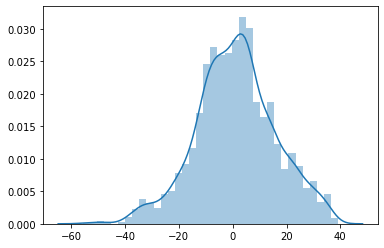

In [158]:
predictions = lasso_grid.predict(X_test)
sns.distplot((y_test-predictions))

In [159]:
print('MAE:',metrics.mean_absolute_error(y_test,predictions))
print('MSE:',metrics.mean_squared_error(y_test,predictions))
print('RMSE:',np.sqrt(metrics.mean_squared_error(y_test,predictions)))

MAE: 11.651690614714257
MSE: 222.10459090708605
RMSE: 14.903173853481212


In [182]:
print('score:',lasso_grid.score(X_test,y_test))
#print(cross_val_score(ridge_grid,final.drop(['date','total'],axis=1),final['total'],cv=10).mean())

score: -222.10459090708605


In [751]:
custom_input = np.array([[ 0. ,  0. ,  0. ,  0. ,  0. ,  0. ,  0. ,  0. ,  0. ,  0. ,  1. ,
        1. ,  0. ,  0. ,  0. ,  0. ,  0. ,  0. ,
        0. ,  0. ,  0. ,  0. ,  0. ,  0. ,  0. ,
        18.3 , 125. ,  7. , 35. ,  2. ]])

In [752]:
# lasso
lasso_grid.predict(custom_input)

array([132.11093655])

In [753]:
# ridge
ridge_grid.predict(custom_input)

array([131.63324406])

In [741]:
(lm.predict(custom_input)[0])

135.36043061828968

## KNN

In [176]:
knn = KNeighborsRegressor()
param_grid = {
    'n_neighbors' : list(np.arange(20,51))
}

In [177]:
knn_grid = GridSearchCV(knn,param_grid,scoring='neg_mean_squared_error',cv=10,n_jobs=-1,verbose=1)

In [178]:
knn_grid.fit(X_train,y_train)

Fitting 10 folds for each of 31 candidates, totalling 310 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  34 tasks      | elapsed:    6.2s
[Parallel(n_jobs=-1)]: Done 184 tasks      | elapsed:   38.4s
[Parallel(n_jobs=-1)]: Done 310 out of 310 | elapsed:  1.1min finished


GridSearchCV(cv=10, error_score=nan,
             estimator=KNeighborsRegressor(algorithm='auto', leaf_size=30,
                                           metric='minkowski',
                                           metric_params=None, n_jobs=None,
                                           n_neighbors=5, p=2,
                                           weights='uniform'),
             iid='deprecated', n_jobs=-1,
             param_grid={'n_neighbors': [20, 21, 22, 23, 24, 25, 26, 27, 28, 29,
                                         30, 31, 32, 33, 34, 35, 36, 37, 38, 39,
                                         40, 41, 42, 43, 44, 45, 46, 47, 48, 49, ...]},
             pre_dispatch='2*n_jobs', refit=True, return_train_score=False,
             scoring='neg_mean_squared_error', verbose=1)

In [179]:
knn_grid.best_params_

{'n_neighbors': 36}

In [180]:
knn_grid.best_score_

-340.39699652100114

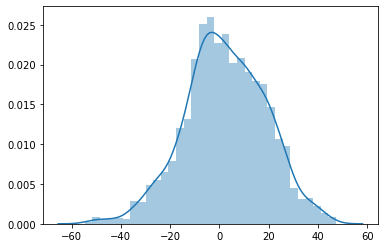

In [535]:
sns.distplot(y_test-knn_grid.predict(X_test))

## Random Forest

In [198]:
rf = RandomForestRegressor()
param_grid = {
    'n_estimators' : list(np.arange(10,201,20)),
    'max_depth' : list(np.arange(2,11,2)) + [None],
    'bootstrap' : [True,False]
}

In [199]:
rf_grid = GridSearchCV(rf,param_grid,scoring='neg_mean_squared_error',cv=10,verbose=1,n_jobs=-1)

In [200]:
rf_grid.fit(X_train,y_train)

Fitting 10 folds for each of 120 candidates, totalling 1200 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  34 tasks      | elapsed:   14.1s
[Parallel(n_jobs=-1)]: Done 184 tasks      | elapsed:  2.8min
[Parallel(n_jobs=-1)]: Done 434 tasks      | elapsed: 11.1min
[Parallel(n_jobs=-1)]: Done 784 tasks      | elapsed: 26.6min
[Parallel(n_jobs=-1)]: Done 1200 out of 1200 | elapsed: 53.9min finished


GridSearchCV(cv=10, error_score=nan,
             estimator=RandomForestRegressor(bootstrap=True, ccp_alpha=0.0,
                                             criterion='mse', max_depth=None,
                                             max_features='auto',
                                             max_leaf_nodes=None,
                                             max_samples=None,
                                             min_impurity_decrease=0.0,
                                             min_impurity_split=None,
                                             min_samples_leaf=1,
                                             min_samples_split=2,
                                             min_weight_fraction_leaf=0.0,
                                             n_estimators=100, n_jobs=None,
                                             oob_score=False, random_state=None,
                                             verbose=0, warm_start=False),
             iid='deprecated', n_j

In [201]:
rf_grid.best_params_

{'bootstrap': True, 'max_depth': 8, 'n_estimators': 90}

In [202]:
rf_grid.best_score_

-342.05374781478133

In [184]:
rf = RandomForestRegressor(n_estimators=90,max_depth=8)

In [186]:
rf.fit(X_train,y_train)

RandomForestRegressor(bootstrap=True, ccp_alpha=0.0, criterion='mse',
                      max_depth=8, max_features='auto', max_leaf_nodes=None,
                      max_samples=None, min_impurity_decrease=0.0,
                      min_impurity_split=None, min_samples_leaf=1,
                      min_samples_split=2, min_weight_fraction_leaf=0.0,
                      n_estimators=90, n_jobs=None, oob_score=False,
                      random_state=None, verbose=0, warm_start=False)

In [187]:
predictions = rf.predict(X_test)

In [188]:
print('MAE:',metrics.mean_absolute_error(y_test,predictions))
print('MSE:',metrics.mean_squared_error(y_test,predictions))
print('RMSE:',np.sqrt(metrics.mean_squared_error(y_test,predictions)))

MAE: 13.645890954187264
MSE: 288.9829712266713
RMSE: 16.999499146347556


## Model Export

In [189]:
import pickle

In [200]:
with open('ipl-score-prediction-model.pkl','wb') as f:
    pickle.dump(ridge_grid,f)

## Predictions

In [799]:
def predict_score(venue='Wankhede Stadium',batting_team='Chennai Super Kings',bowling_team='Mumbai Indians',overs=10,runs=80,wickets=2,runs_last5=40,wickets_last5=1):
    temp_array = []
    
    # Venue
    if venue == 'Feroz Shah Kotla':
        temp_array = temp_array + [1,0,0,0,0,0,0,0,0,0,0]
    elif venue == 'Himachal Pradesh Cricket Association Stadium':
        temp_array = temp_array + [0,1,0,0,0,0,0,0,0,0,0]
    elif venue == 'M Chinnaswamy Stadium':
        temp_array = temp_array + [0,0,1,0,0,0,0,0,0,0,0]
    elif venue == 'MA Chidambaram Stadium, Chepauk':
        temp_array = temp_array + [0,0,0,1,0,0,0,0,0,0,0]
    elif venue == 'Punjab Cricket Association IS Bindra Stadium, Mohali':
        temp_array = temp_array + [0,0,0,0,1,0,0,0,0,0,0]
    elif venue == 'Punjab Cricket Association Stadium, Mohali':
        temp_array = temp_array + [0,0,0,0,0,1,0,0,0,0,0]
    elif venue == 'Rajiv Gandhi International Stadium, Uppal':
        temp_array = temp_array + [0,0,0,0,0,0,1,0,0,0,0]
    elif venue == 'Sardar Patel Stadium, Motera':
        temp_array = temp_array + [0,0,0,0,0,0,0,1,0,0,0]
    elif venue == 'Sawai Mansingh Stadium':
        temp_array = temp_array + [0,0,0,0,0,0,0,0,1,0,0]
    elif venue == 'Wankhede Stadium':
        temp_array = temp_array + [0,0,0,0,0,0,0,0,0,1,0]
    elif venue == 'Others':
        temp_array = temp_array + [0,0,0,0,0,0,0,0,0,0,1]
    elif venue == 'Eden Gardens':
        temp_array = temp_array + [0,0,0,0,0,0,0,0,0,0,0]
        
    # Batting Team
    if batting_team == 'Chennai Super Kings':
        temp_array = temp_array + [0,0,0,0,0,0,0]
    elif batting_team == 'Delhi Daredevils':
        temp_array = temp_array + [1,0,0,0,0,0,0]
    elif batting_team == 'Kings XI Punjab':
        temp_array = temp_array + [0,1,0,0,0,0,0]
    elif batting_team == 'Kolkata Knight Riders':
        temp_array = temp_array + [0,0,1,0,0,0,0]
    elif batting_team == 'Mumbai Indians':
        temp_array = temp_array + [0,0,0,1,0,0,0]
    elif batting_team == 'Rajasthan Royals':
        temp_array = temp_array + [0,0,0,0,1,0,0]
    elif batting_team == 'Royal Challengers Bangalore':
        temp_array = temp_array + [0,0,0,0,0,1,0]
    elif batting_team == 'Sunrisers Hyderabad':
        temp_array = temp_array + [0,0,0,0,0,0,1]
    
    # Bowling Team
    if bowling_team == 'Chennai Super Kings':
        temp_array = temp_array + [0,0,0,0,0,0,0]
    elif bowling_team == 'Delhi Daredevils':
        temp_array = temp_array + [1,0,0,0,0,0,0]
    elif bowling_team == 'Kings XI Punjab':
        temp_array = temp_array + [0,1,0,0,0,0,0]
    elif bowling_team == 'Kolkata Knight Riders':
        temp_array = temp_array + [0,0,1,0,0,0,0]
    elif bowling_team == 'Mumbai Indians':
        temp_array = temp_array + [0,0,0,1,0,0,0]
    elif bowling_team == 'Rajasthan Royals':
        temp_array = temp_array + [0,0,0,0,1,0,0]
    elif bowling_team == 'Royal Challengers Bangalore':
        temp_array = temp_array + [0,0,0,0,0,1,0]
    elif bowling_team == 'Sunrisers Hyderabad':
        temp_array = temp_array + [0,0,0,0,0,0,1]
        
    # Overs, Runs, Wickets, Runs_last5, Wickets_last5
    temp_array = temp_array + [overs,runs,wickets,runs_last5,wickets_last5]
    
    # Converting into numpy array
    temp_array = np.array([temp_array])
    
    return int(ridge_grid.predict(temp_array)[0].round())

## Prediction 1
* IPL: Season 12
* Match: Final
* Teams: CSK vs MI
* First Innings score: 149-8

In [800]:
final_score = predict_score(venue='Rajiv Gandhi International Stadium, Uppal',\
                           batting_team='Mumbai Indians',
                            bowling_team='Chennai Super Kings',overs=11.2,\
                           runs=82,wickets=3,runs_last5=30,wickets_last5=1)
print("The final predicted score (range): {} to {}".format(final_score-10, final_score+5))

The final predicted score (range): 148 to 163


## Prediction 2
* IPL: Season 12
* Match: Quarter Final - 2
* Teams: CSK vs DC
* First Innings score: 147-9 .... ***(last over - 16 runs)***

In [801]:
final_score = predict_score(venue='Others',\
                           batting_team='Delhi Daredevils',\
                            bowling_team='Chennai Super Kings',overs=11.3,\
                           runs=75,wickets=4,runs_last5=30,wickets_last5=2)
print("The final predicted score (range): {} to {}".format(final_score-10, final_score+5))

The final predicted score (range): 132 to 147


## Prediction 3
* IPL: Season 12
* Match: Eliminator
* Teams: SRH vs DC
* First Innings score: 162-8 ....***(last over - 11 runs)***

In [802]:
final_score = predict_score(venue='Others',\
                           batting_team='Sunrisers Hyderabad',\
                            bowling_team='Delhi Daredevils',overs=13.2,\
                           runs=90,wickets=2,runs_last5=26,wickets_last5=1)
print("The final predicted score (range): {} to {}".format(final_score-10, final_score+5))

The final predicted score (range): 146 to 161


## Prediction 4
* IPL: Season 12
* Match: Quarter Final - 1
* Teams: CSK vs MI
* First Innings score: 131-4

In [803]:
final_score = predict_score(venue='MA Chidambaram Stadium, Chepauk',\
                           batting_team='Chennai Super Kings',\
                            bowling_team='Mumbai Indians',overs=12,\
                           runs=65,wickets=3,runs_last5=28,wickets_last5=0)
print("The final predicted score (range): {} to {}".format(final_score-10, final_score+5))

The final predicted score (range): 128 to 143


## Prediction 5
* IPL: Season 12
* Match: 56
* Teams: KKR vs MI
* First Innings score: 133-7

In [804]:
final_score = predict_score(venue='Wankhede Stadium',\
                           batting_team='Kolkata Knight Riders',\
                            bowling_team='Mumbai Indians',overs=12.4,\
                           runs=72,wickets=3,runs_last5=20,wickets_last5=2)
print("The final predicted score (range): {} to {}".format(final_score-10, final_score+5))

The final predicted score (range): 131 to 146


## Prediction 6
* IPL: Season 12
* Match: 36
* Teams: RR vs MI
* First Innings score: 161-5

In [805]:
final_score = predict_score(venue='Sawai Mansingh Stadium',\
                           batting_team='Mumbai Indians',\
                            bowling_team='Rajasthan Royals',overs=11.3,\
                           runs=81,wickets=1,runs_last5=36,wickets_last5=0)
print("The final predicted score (range): {} to {}".format(final_score-10, final_score+5))

The final predicted score (range): 158 to 173


In [809]:
final_score = predict_score(venue='Sawai Mansingh Stadium',\
                           batting_team='Mumbai Indians',\
                            bowling_team='Rajasthan Royals',overs=19.1,\
                           runs=151,wickets=5,runs_last5=45,wickets_last5=3)
print("The final predicted score (range): {} to {}".format(final_score-10, final_score+5))

The final predicted score (range): 153 to 168
